<a href="https://colab.research.google.com/github/Faresapn/PERBANDINGAN-DATASET/blob/main/UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Memasang modul terbaru yang diperlukan dalam proyek
!pip install -U imbalanced-learn
!pip install -U scikit-learn
!pip install -U pywaffle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.2/25.2 MB 36.7 MB/s eta 0:00:00


In [ ]:
# Untuk visualisasi data
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle

# Untuk pengolahan data
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Untuk pembuatan model
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

# Untuk evaluasi model
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
import pandas as pd
data1 = pd.read_csv('label_dataset.csv')
data2 = pd.read_csv('fitur_dataset.csv')
frames = [data1, data2]
result = pd.merge (data1, data2, left_index=True, right_index=True)
result.to_csv(r'result.csv', index=False)


In [ ]:
data = pd.read_csv('result.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9722 entries, 0 to 9721
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0_x                    9722 non-null   int64  
 1   Stroke                          9722 non-null   int64  
 2   Unnamed: 0_y                    9722 non-null   int64  
 3   age                             9722 non-null   float64
 4   hypertension                    9722 non-null   float64
 5   heart_disease                   9722 non-null   float64
 6   avg_glucose_level               9722 non-null   float64
 7   bmi                             9722 non-null   float64
 8   gender_Female                   9722 non-null   float64
 9   gender_Male                     9722 non-null   float64
 10  gender_Other                    9722 non-null   float64
 11  ever_married_No                 9722 non-null   float64
 12  ever_married_Yes                97

In [ ]:

data.drop('Unnamed: 0_y', inplace=True, axis=1)
data.drop('Unnamed: 0_x', inplace=True, axis=1)
data

,Stroke,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0.816895,0.0,1.0,0.801265,0.301260,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1,0.743652,0.0,0.0,0.679023,0.234135,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,0.975586,0.0,1.0,0.234512,0.254296,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,0.597168,0.0,0.0,0.536008,0.276060,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1,0.963379,1.0,0.0,0.549349,0.156930,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9717,1,0.654862,1.0,0.0,0.522353,0.225812,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9718,1,0.864981,0.0,0.0,0.935815,0.321592,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9719,1,0.749370,0.0,0.0,0.408889,0.223904,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9720,1,0.916245,0.0,0.0,0.105444,0.217206,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


3.1 Memuat Data pada sebuah Dataframe menggunakan pandas

---



In [ ]:
data.isna().sum()

Stroke                            0
age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
gender_Female                     0
gender_Male                       0
gender_Other                      0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9722 entries, 0 to 9721
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Stroke                          9722 non-null   int64  
 1   age                             9722 non-null   float64
 2   hypertension                    9722 non-null   float64
 3   heart_disease                   9722 non-null   float64
 4   avg_glucose_level               9722 non-null   float64
 5   bmi                             9722 non-null   float64
 6   gender_Female                   9722 non-null   float64
 7   gender_Male                     9722 non-null   float64
 8   gender_Other                    9722 non-null   float64
 9   ever_married_No                 9722 non-null   float64
 10  ever_married_Yes                9722 non-null   float64
 11  work_type_Govt_job              9722 non-null   float64
 12  work_type_Never_worked          97

In [ ]:
# Memuat deskripsi setiap kolom dataframe
round (data.describe(exclude = 'object'), 2)

,Stroke,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,9722.0,9722.00,9722.00,9722.00,9722.00,9722.00,9722.00,9722.00,9722.00,9722.00,...,9722.00,9722.00,9722.00,9722.00,9722.00,9722.00,9722.00,9722.00,9722.00,9722.00
mean,0.5,0.67,0.17,0.10,0.29,0.22,0.57,0.43,0.00,0.22,...,0.00,0.60,0.21,0.07,0.48,0.52,0.25,0.23,0.37,0.15
std,0.5,0.27,0.35,0.28,0.23,0.08,0.49,0.49,0.01,0.41,...,0.05,0.48,0.40,0.26,0.50,0.50,0.43,0.41,0.48,0.36
min,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.0,0.51,0.00,0.00,0.12,0.18,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.5,0.74,0.00,0.00,0.20,0.22,1.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
75%,1.0,0.89,0.00,0.00,0.41,0.26,1.00,1.00,0.00,0.00,...,0.00,1.00,0.00,0.00,1.00,1.00,0.33,0.00,1.00,0.00
max,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [ ]:
data.head()

,Stroke,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0.816895,0.0,1.0,0.801265,0.301260,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1,0.743652,0.0,0.0,0.679023,0.234135,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,0.975586,0.0,1.0,0.234512,0.254296,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,0.597168,0.0,0.0,0.536008,0.276060,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1,0.963379,1.0,0.0,0.549349,0.156930,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


VISUALISASI DATA

<Axes: >

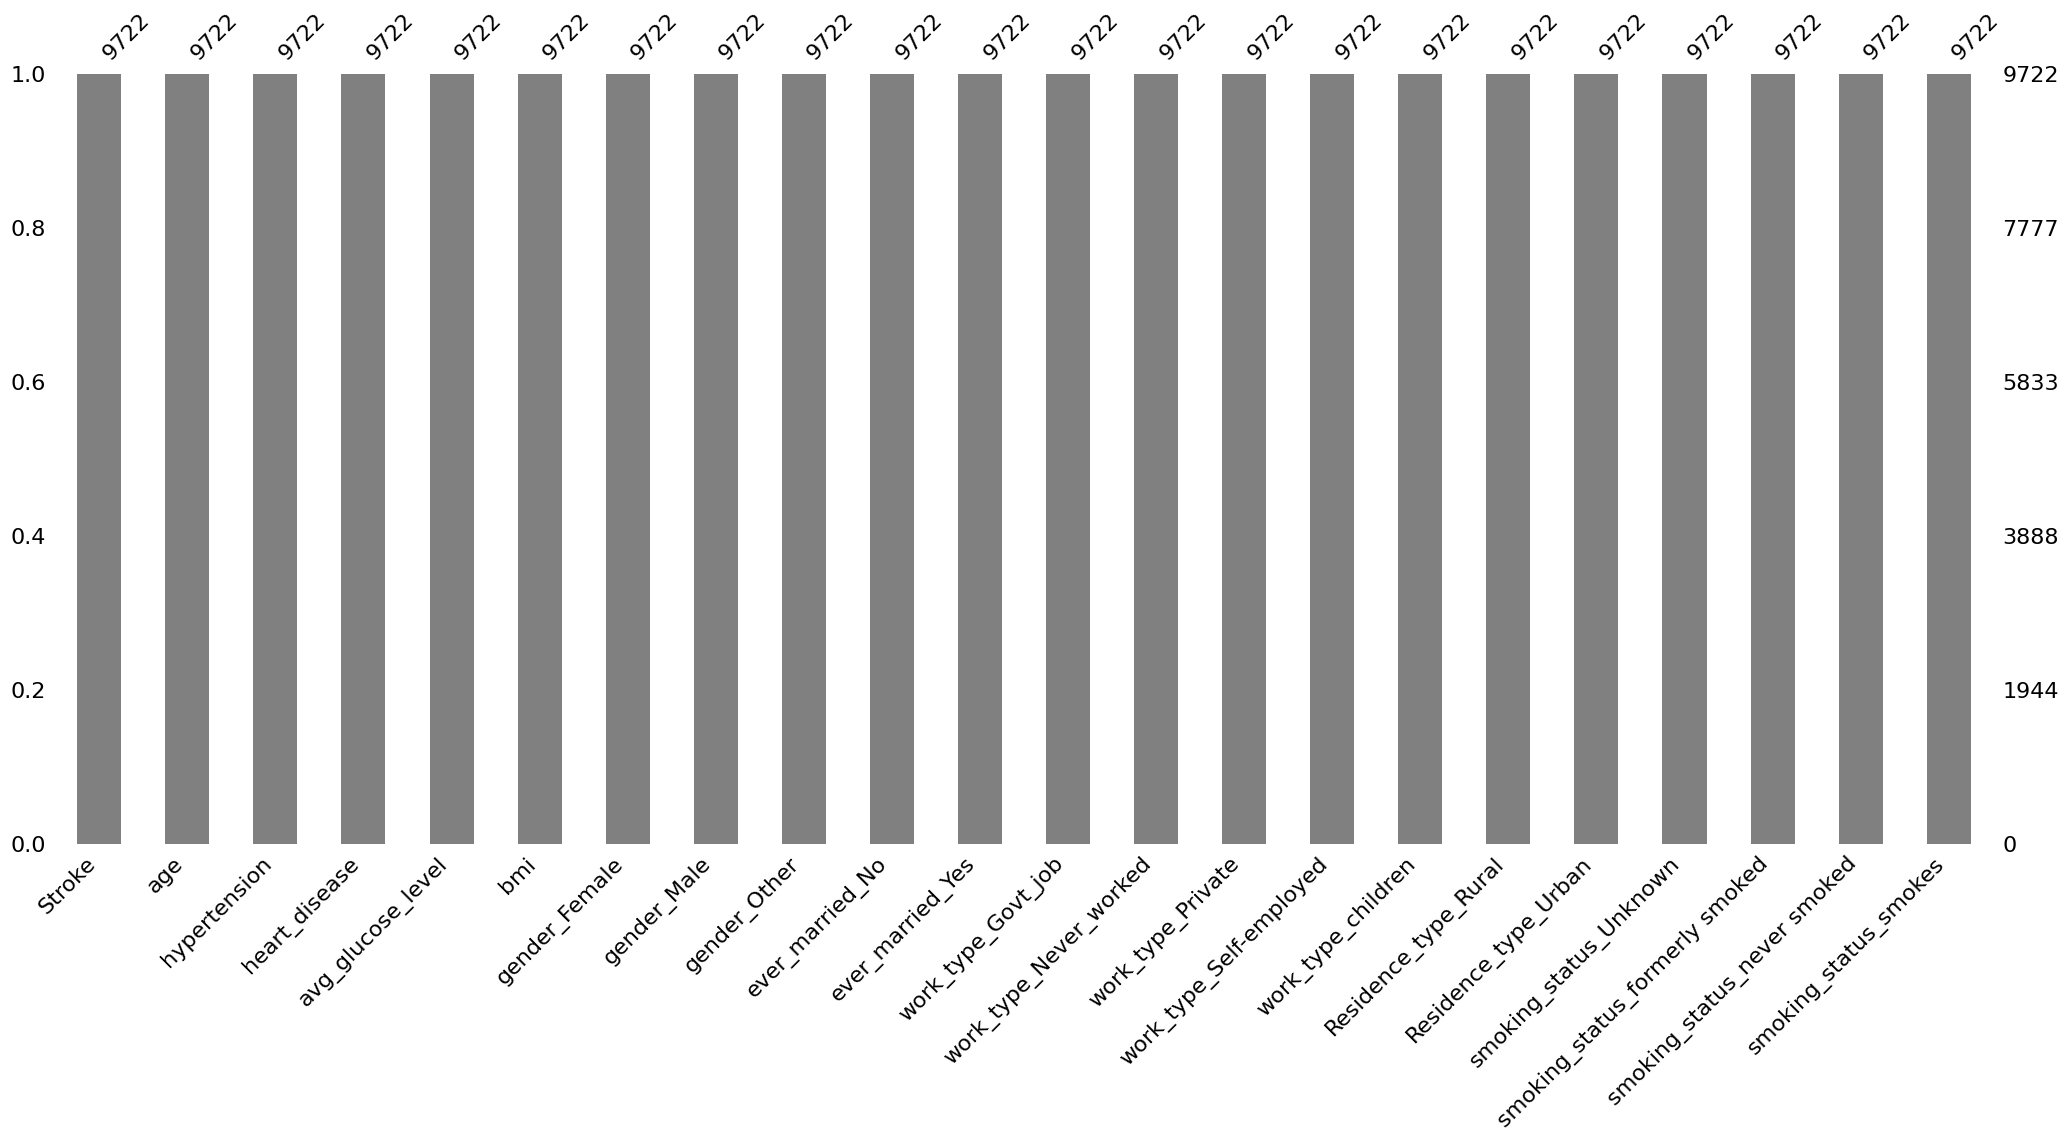

In [ ]:
# Melakukan visualisasi data yang kosong
colors = ['grey']
msno.bar(data, color=colors)

In [ ]:
stroke_data = pd.DataFrame(data['Stroke'].value_counts())
figures = px.pie(data_frame = stroke_data,
             values='Stroke',
             names=['healthy','stroke'],
             hole=0.38,
             color_discrete_sequence=["#9FD8DF","#FF7171"],
             labels={'label':'Stroke','Stroke':'No. Of Samples'})

figures.update_layout(font_family='Open Sans',
                      title=dict(text='Distribusi kelas pada kolom stroke',
                                 x=0.49,
                                 y=0.98,
                                 font=dict(color="#333",size=20)),
                      hoverlabel=dict(bgcolor='white'))

figures.update_traces(textposition='outside', textinfo='percent+label')

figures.show()

In [ ]:
X = data.drop('Stroke', axis = 1)
y = data['Stroke']

In [ ]:
# Inisialisasi fungsi OneHotEncoder dan MinMaxScaler
ohe = OneHotEncoder()
mms = MinMaxScaler()

In [ ]:
# Membedakan kolom data kategori dan numerik berkelanjutan
num_con = ['age', 'hypertension','heart_disease','avg_glucose_level','bmi','gender_Female','gender_Male','gender_Other','ever_married_No','ever_married_Yes','work_type_Govt_job','work_type_Never_worked','work_type_Private','work_type_Self-employed','work_type_children','Residence_type_Rural','Residence_type_Urban','smoking_status_Unknown','smoking_status_formerly smoked','smoking_status_never smoked','smoking_status_smokes']

In [ ]:
# Standarisasi nilai data pada fitur
# numerik berkelanjutan dengan MinMaxScaler
X[num_con] = mms.fit_transform(X[num_con])

In [ ]:
# Menyandikan label fitur dengan teknik one-hot encoding
temp = X.drop(columns = num_con)
dummies = pd.get_dummies(X[num_con])
X = pd.concat([temp,dummies], axis = 1)

In [ ]:
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.816895,0.0,1.0,0.801265,0.301260,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.743652,0.0,0.0,0.679023,0.234135,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.975586,0.0,1.0,0.234512,0.254296,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.597168,0.0,0.0,0.536008,0.276060,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.963379,1.0,0.0,0.549349,0.156930,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9717,0.654862,1.0,0.0,0.522353,0.225812,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9718,0.864981,0.0,0.0,0.935815,0.321592,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9719,0.749370,0.0,0.0,0.408889,0.223904,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9720,0.916245,0.0,0.0,0.105444,0.217206,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


4.3 Mengatasi masalah data yang kosong dengan KNN Imputation

In [ ]:
# Melakukan penggantian data kosong dengan penggantian berbasis jarak
imputer = KNNImputer(n_neighbors=5)
X = pd.DataFrame(imputer.fit_transform(X),columns = X.columns)

In [ ]:
# Mengecek kembali nilai yang kosong pada dataset
X.isna().sum()

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
gender_Female                     0
gender_Male                       0
gender_Other                      0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

4.4

In [ ]:
# Menghitung label sebelum dilakukan oversampling
print("Label '1': {}".format(sum(y==1)))
print("Label '0': {} \n".format(sum(y==0)))

Label '1': 4861
Label '0': 4861 



In [ ]:
# Inisialisasi teknik SMOTE
sm = SMOTE(random_state = 42)

In [ ]:
# Melakukan resample sehingga banyak data pada label = 1 adalah 4861
X_res, y_res = sm.fit_resample(X, y.ravel())

In [ ]:
# Menghitung label setelah dilakukan oversampling
print('Shape of Training features: {}'.format(X_res.shape))
print('Shape of Training targets: {}'.format(y_res.shape))
print("Label '1': {}".format(sum(y_res==1)))
print("Label '0': {} \n".format(sum(y_res==0)))

Shape of Training features: (9722, 21)
Shape of Training targets: (9722,)
Label '1': 4861
Label '0': 4861 



In [ ]:
Y_ser = pd.Series(y_res, name='is_stroke')
Y_ser

0       1
1       1
2       1
3       1
4       1
       ..
9717    1
9718    1
9719    1
9720    1
9721    1
Name: is_stroke, Length: 9722, dtype: int64

In [ ]:
results = pd.merge(X_res,Y_ser, left_index=True, right_index=True)

In [ ]:
results

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,is_stroke
0,0.816895,0.0,1.0,0.801265,0.301260,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
1,0.743652,0.0,0.0,0.679023,0.234135,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
2,0.975586,0.0,1.0,0.234512,0.254296,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
3,0.597168,0.0,0.0,0.536008,0.276060,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
4,0.963379,1.0,0.0,0.549349,0.156930,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9717,0.654862,1.0,0.0,0.522353,0.225812,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
9718,0.864981,0.0,0.0,0.935815,0.321592,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
9719,0.749370,0.0,0.0,0.408889,0.223904,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
9720,0.916245,0.0,0.0,0.105444,0.217206,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1


In [ ]:
# Melakukan pembagian data dengan train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [ ]:
X_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
5377,0.723648,0.000000,0.298617,0.593693,0.244417,1.0,0.0,0.0,0.0,1.0,...,0.0,1.000000,0.000000,0.0,0.0,1.0,0.0,0.000000,1.0,0.000000
6692,0.894366,0.000000,0.000000,0.463783,0.289752,0.0,1.0,0.0,0.0,1.0,...,0.0,1.000000,0.000000,0.0,1.0,0.0,0.0,0.000000,1.0,0.000000
4996,0.487305,0.000000,0.000000,0.179346,0.152348,1.0,0.0,0.0,0.0,1.0,...,0.0,1.000000,0.000000,0.0,0.0,1.0,0.0,0.000000,1.0,0.000000
1561,0.755859,1.000000,1.000000,0.317745,0.280641,0.0,1.0,0.0,0.0,1.0,...,0.0,1.000000,0.000000,0.0,0.0,1.0,0.0,1.000000,0.0,0.000000
2114,0.353027,0.000000,0.000000,0.120395,0.145475,1.0,0.0,0.0,0.0,1.0,...,0.0,1.000000,0.000000,0.0,0.0,1.0,1.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.895875,0.387724,0.000000,0.693811,0.175121,0.0,1.0,0.0,0.0,1.0,...,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.612276,0.0,0.387724
5191,0.823120,1.000000,0.000000,0.101552,0.212498,0.0,1.0,0.0,0.0,1.0,...,0.0,0.500477,0.000000,0.0,0.0,1.0,0.0,1.000000,0.0,0.000000
5390,0.963153,0.000000,0.327153,0.109196,0.105780,1.0,0.0,0.0,0.0,1.0,...,0.0,0.672847,0.327153,0.0,1.0,0.0,1.0,0.000000,0.0,0.000000
860,0.560547,0.000000,0.000000,0.207876,0.458190,1.0,0.0,0.0,0.0,1.0,...,0.0,1.000000,0.000000,0.0,1.0,0.0,0.0,0.000000,0.0,1.000000


In [ ]:
# Mengecek jumlah baris setelah dilakukan pembagian data latih dan data uji
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7777, 21)
(1945, 21)
(7777,)
(1945,)


5.1 Model Pertama dengan Algoritma Multi-Layer Perceptron

In [ ]:
# Pembuatan model pertama
model_mlp = MLPClassifier(hidden_layer_sizes=(100),random_state=2021)
model_mlp.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



MLPClassifier(hidden_layer_sizes=100, random_state=2021)

In [ ]:
# Pengujian model terhadap data test
y_pred_mlp = model_mlp.predict(X_test)

In [ ]:
mlp_report = classification_report(y_test, y_pred_mlp, output_dict=True, target_names=['Healthy',"Stroke"])
pd.DataFrame(mlp_report).transpose()

,precision,recall,f1-score,support
Healthy,0.918051,0.850256,0.882854,975.000000
Stroke,0.859885,0.923711,0.890656,970.000000
accuracy,0.886889,0.886889,0.886889,0.886889
macro avg,0.888968,0.886984,0.886755,1945.000000
weighted avg,0.889043,0.886889,0.886745,1945.000000


In [ ]:
# Menyimpan hasil prediksi untuk confussion matrix
mlp_cf = confusion_matrix(y_test, y_pred_mlp)

In [ ]:
from keras import models
from keras import layers
from tensorflow.keras.utils import to_categorical

In [ ]:
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

5.2 Model Kedua dengan Algoritma K-Nearest Neighbors

In [ ]:
# Pembuatan model pertama
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Pengujian model terhadap data test
y_pred_knn = model_knn.predict(X_test)

In [ ]:
y_pred_knn

array([0, 1, 0, ..., 0, 0, 1])

In [ ]:
knn_report = classification_report(y_test, y_pred_knn, output_dict=True, target_names=['Healthy',"Stroke"])
pd.DataFrame(knn_report).transpose()

,precision,recall,f1-score,support
Healthy,0.964200,0.828718,0.891340,975.000000
Stroke,0.849142,0.969072,0.905152,970.000000
accuracy,0.898715,0.898715,0.898715,0.898715
macro avg,0.906671,0.898895,0.898246,1945.000000
weighted avg,0.906819,0.898715,0.898228,1945.000000


In [ ]:
# Menyimpan hasil prediksi untuk confussion matrix
knn_cf = confusion_matrix(y_test, y_pred_knn)

6.1 Perbandingan metriks antara model pertama dengan model yang kedua

In [ ]:
# Memasukkan hasil laporan klasifikasi model pada dataframe
metrics = pd.DataFrame({'accuracy' : [knn_report['accuracy']],
                        'precision_0' : [knn_report['Healthy']['precision']],
                        'recall_0' : [knn_report['Healthy']['recall']],
                        'f1-score_0' : [knn_report['Healthy']['f1-score']],
                        'precision_1' : [knn_report['Stroke']['precision']],
                        'recall_1' : [knn_report['Stroke']['recall']],
                        'f1-score_1' : [mlp_report['Stroke']['f1-score'],knn_report['Stroke']['f1-score']]},
                        index=['Model Multi-Layer Perceptron','Model K-Nearest Neighbors'])
multiheader = [('','accuracy'),
               ('Healthy', 'precision'),
               ('Healthy', 'recall'),
               ('Healthy', 'f1-score'),
               ('Stroke', 'precision'),
               ('Stroke', 'recall'),
               ('Stroke', 'f1-score')]
metrics.columns = pd.MultiIndex.from_tuples(multiheader)
# Menampilkan dataframe
metrics

Healthy                       Stroke  \
                              accuracy precision    recall f1-score precision   
Model Multi-Layer Perceptron  0.898715    0.9642  0.828718  0.89134  0.849142   
Model K-Nearest Neighbors     0.898715    0.9642  0.828718  0.89134  0.849142   

                                                  
                                recall  f1-score  
Model Multi-Layer Perceptron  0.969072  0.890656  
Model K-Nearest Neighbors     0.969072  0.905152

In [ ]:
metrics.to_csv("Hasil_akhir_format.csv", index=True)